# Extract and map admin boundaries from GeoBoundaries

In [1]:
import sys, os, importlib

import pandas as pd
import geopandas as gpd

sys.path.insert(0, "../src")

import GOSTRocks.mapMisc as mapMisc
import GOSTRocks.dataMisc as dataMisc

%load_ext autoreload
%autoreload 2

/home/wb411133/.conda/envs/ee/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
dir(dataMisc)

['Config',
 'UNSIGNED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'aws_search_ntl',
 'boto3',
 'get_geoboundaries',
 'gpd',
 'json',
 'pd',
 'urllib']

In [3]:
dataMisc.get_geoboundaries?

In [4]:
sel_iso3 = "UGA"
sel_country = dataMisc.get_geoboundaries(sel_iso3, 'ADM2')
sel_country

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Abim,,29229248B2720911975926,UGA,ADM2,"POLYGON ((33.96576 2.61670, 33.95916 2.62089, ..."
1,Adjumani,,29229248B5864304727943,UGA,ADM2,"POLYGON ((32.06201 3.57961, 32.06209 3.57970, ..."
2,Agago,,29229248B46383558561496,UGA,ADM2,"POLYGON ((33.55948 3.14894, 33.55869 3.15924, ..."
3,Alebtong,,29229248B1604569270541,UGA,ADM2,"POLYGON ((33.53498 2.35203, 33.53486 2.35187, ..."
4,Amolatar,,29229248B8101446493380,UGA,ADM2,"POLYGON ((32.94045 1.81336, 32.93815 1.81341, ..."
...,...,...,...,...,...,...
130,Ssembabule,,29229248B69968186094061,UGA,ADM2,"POLYGON ((31.60093 0.05001, 31.59999 0.05042, ..."
131,Tororo,,29229248B21797160627701,UGA,ADM2,"POLYGON ((33.97873 0.57800, 33.97875 0.57799, ..."
132,Wakiso,,29229248B89585843617230,UGA,ADM2,"POLYGON ((32.50099 -0.15249, 32.50111 -0.15233..."
133,Yumbe,,29229248B61629311196164,UGA,ADM2,"POLYGON ((31.40883 3.18405, 31.40880 3.18395, ..."


In [5]:
dir(mapMisc)

['Patch',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ctx',
 'gpd',
 'mpatches',
 'np',
 'pd',
 'plt',
 'static_map_raster',
 'static_map_vector']

In [6]:
mapMisc.static_map_vector?

Error mapping specified column, defaulting to index


<module 'matplotlib.pyplot' from '/home/wb411133/.conda/envs/ee/lib/python3.9/site-packages/matplotlib/pyplot.py'>

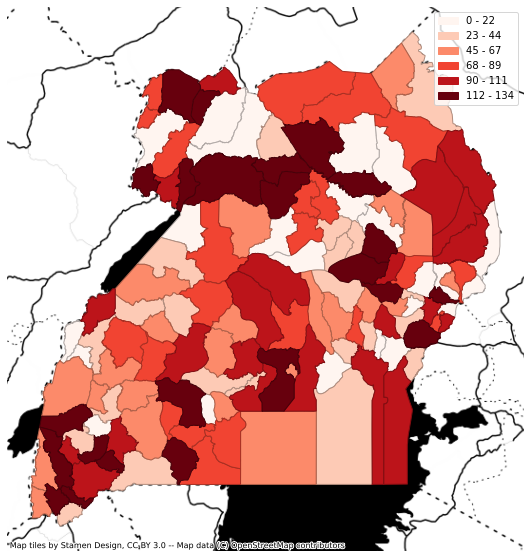

In [10]:
mapMisc.static_map_vector(sel_country, "shapeID")

In [17]:
focus_districts = ['Apac', 'Dokolo', 'Kamuli', 'Kaliro','Buyende']
sel_districts = sel_country.loc[sel_country['shapeName'].isin(focus_districts)]
sel_districts

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
8,Apac,,29229248B63806553713105,UGA,ADM2,"POLYGON ((32.58712 1.65118, 32.58642 1.65264, ..."
29,Buyende,,29229248B78054244522655,UGA,ADM2,"POLYGON ((32.82026 1.47501, 32.82078 1.47207, ..."
30,Dokolo,,29229248B79330670222430,UGA,ADM2,"POLYGON ((33.13554 2.10861, 33.13529 2.10698, ..."
46,Kaliro,,29229248B95132583956705,UGA,ADM2,"POLYGON ((33.33503 1.07730, 33.33547 1.07707, ..."
49,Kamuli,,29229248B80079273075066,UGA,ADM2,"POLYGON ((32.93538 1.22259, 32.93572 1.22041, ..."


Error mapping specified column, defaulting to index


<module 'matplotlib.pyplot' from '/home/wb411133/.conda/envs/ee/lib/python3.9/site-packages/matplotlib/pyplot.py'>

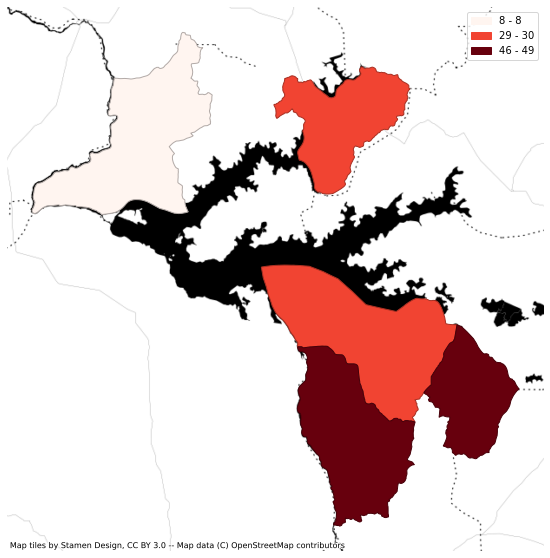

In [18]:
mapMisc.static_map_vector(sel_districts, "shapeID")

In [19]:
sel_districts.to_file(f'{sel_iso3}_sel_districts.geojson', driver="GeoJSON")